In [167]:
# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [287]:
# Importing necassary libraries

import pandas as pd  # for dataframe maulpulations and calculations
import numpy as np

import scipy # for numerical computations
import scipy.stats as stats # for statistcal tests

import seaborn as sns  # for data visualizations
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder # for label encoding

# Data description

- **deposit_type** : Type of deposit made for booking( No Deposit – no deposit was made, Non Refund – a deposit was made in the value of the total stay cost, Refundable – a deposit was made with a value under the total cost of stay).
- **customer_type** : Type of booking (Contract - when the booking has an allotment or other type of contract associated to it, Groups – when the booking is associated to a group, Transient – when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party – when the booking is transient, but is associated to at least other transient booking).
- **adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
- **required_car_parking_spaces** : Number of car parking spaces required by the customer.
- **total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status** : Reservation last status (Canceled – booking was canceled by the customer, CheckOut – customer has checked in but already departed, No-Show – customer did not check-in and did inform the hotel of the reason why)
- **reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked out of the hotel.
- **market_segment** : Market segment designation. (TA =Travel Agents ,TO=Tour Operators).
- **distribution_channel** : Booking distribution channel.(TA=Travel Agents, TO=Tour Operators).
- **is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0).
- **previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking.
- **previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking.
- **reserved_room_type** : Code of reserved room. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
- **booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- **agent** : ID of the travel agency that made the booking.


In [169]:
df = pd.read_excel('Hotel Bookings.xlsx')

# to check first 3 rows of the data 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,adr,required_car_parking_spaces,reservation_status
0,Resort Hotel,1,74,2017,January,1,1,0,2,0,...,0,A,A,0,5.0,NaN,Transient,57.60,0,Canceled
1,Resort Hotel,1,62,2017,January,1,2,2,2,0,...,0,A,A,0,240.0,NaN,Transient,51.50,0,Canceled
2,Resort Hotel,1,62,2017,January,1,2,2,2,0,...,0,A,A,0,240.0,NaN,Transient,51.50,0,Canceled
3,Resort Hotel,1,62,2017,January,1,2,2,2,0,...,0,A,A,0,240.0,NaN,Transient,51.50,0,Canceled
4,Resort Hotel,1,71,2017,January,1,2,2,1,0,...,0,A,A,0,241.0,NaN,Transient,32.22,0,Canceled


In [170]:
# to check the last 3 values of the data 
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,adr,required_car_parking_spaces,reservation_status
40682,City Hotel,0,23,2017,August,30,2,5,2,0,...,0,A,A,0,394.0,NaN,Transient,96.14,0,Check-Out
40683,City Hotel,0,102,2017,August,31,2,5,3,0,...,0,E,E,0,9.0,NaN,Transient,225.43,0,Check-Out
40684,City Hotel,0,34,2017,August,31,2,5,2,0,...,0,D,D,0,9.0,NaN,Transient,157.71,0,Check-Out
40685,City Hotel,0,109,2017,August,31,2,5,2,0,...,0,A,A,0,89.0,NaN,Transient,104.40,0,Check-Out
40686,City Hotel,0,205,2017,August,29,2,7,2,0,...,0,A,A,0,9.0,NaN,Transient,151.20,0,Check-Out


In [171]:
# check the dimension of the data 
df.shape

(40687, 26)

In [172]:
# check no. of rows and cols in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40687 entries, 0 to 40686
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40687 non-null  object 
 1   is_canceled                     40687 non-null  int64  
 2   lead_time                       40687 non-null  int64  
 3   arrival_date_year               40687 non-null  int64  
 4   arrival_date_month              40687 non-null  object 
 5   arrival_date_day_of_month       40687 non-null  int64  
 6   stays_in_weekend_nights         40687 non-null  int64  
 7   stays_in_week_nights            40687 non-null  int64  
 8   adults                          40687 non-null  int64  
 9   children                        40687 non-null  int64  
 10  meal                            40687 non-null  object 
 11  country                         40604 non-null  object 
 12  market_segment                  

In [173]:
#check the data type
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
agent                             float64
company                           float64
customer_type                      object
adr                               

###### Converting numerical columns to object(categorica) data type

In [174]:
df['is_canceled'] = df['is_canceled'].astype(object)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(object)
df['previous_cancellations'] = df['previous_cancellations'].astype(object)
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype(object)
df['agent'] = df['agent'].astype(object)
df['booking_changes'] = df['booking_changes'].astype(object)
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].astype(object)
df['agent'] = df['agent'].astype(object)

In [175]:
df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations             object
previous_bookings_not_canceled     object
reserved_room_type                 object
assigned_room_type                 object
booking_changes                    object
agent                              object
company                           float64
customer_type                      object
adr                               

In [176]:
# The statistical summary of numeric variables
df.describe()

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,company,adr
count,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,2310.000000,40687.000000
mean,109.259223,2017.0,15.717576,0.973308,2.601543,1.877995,0.126281,239.696970,114.637950
std,107.940953,0.0,8.789609,1.014337,1.973291,0.496172,0.436139,148.398028,52.256304
min,0.000000,2017.0,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,-6.380000
25%,23.000000,2017.0,8.000000,0.000000,1.000000,2.000000,0.000000,127.000000,80.000000
50%,80.000000,2017.0,16.000000,1.000000,2.000000,2.000000,0.000000,223.000000,107.100000
75%,164.500000,2017.0,23.000000,2.000000,3.000000,2.000000,0.000000,366.000000,140.000000
max,629.000000,2017.0,31.000000,16.000000,40.000000,4.000000,3.000000,543.000000,510.000000


In [177]:
# The statistical summary of categorical variables
df.describe(include = object)

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,customer_type,required_car_parking_spaces,reservation_status
count,40687,40687,40687,40687,40604,40687,40687,40687,40687,40687,40687,40687,40687,35023.0,40687,40687,40687
unique,2,2,8,5,149,7,4,2,7,46,9,11,16,191.0,4,5,3
top,City Hotel,0,May,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,9.0,Transient,0,Check-Out
freq,27508,24942,6313,30524,12962,22651,33617,39296,40409,39259,27556,24922,34256,13274.0,33791,38481,24942


## Dropping Irrelavent columns

In [178]:
df.drop(['arrival_date_year'], axis = 1, inplace = True)

In [179]:
# to check if the columns are dropped or not
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'company', 'customer_type', 'adr', 'required_car_parking_spaces',
       'reservation_status'],
      dtype='object')

In [180]:
# we can see the features have now been reduced to 25 from 26 
df.shape

(40687, 25)

### Check Missing Values

In [181]:
# check if there are  null values
df.isnull().values.any()

True

In [182]:
# check the count of  null values in each column
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
meal                                  0
country                              83
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                              5664
company                           38377
customer_type                         0
adr                                   0
required_car_parking_spaces           0
reservation_status                    0


In [183]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

# Dataframe is created with sum, total percentage and data type of nulls for each column 

,Total,Percent,Type
company,38377,94.322511,float64
agent,5664,13.920908,object
country,83,0.203996,object
hotel,0,0.000000,object
is_repeated_guest,0,0.000000,object
required_car_parking_spaces,0,0.000000,object
adr,0,0.000000,float64
customer_type,0,0.000000,object
booking_changes,0,0.000000,object
assigned_room_type,0,0.000000,object


Since we have more than 90% data missing it is inappropriate to assume (replace) it by mode since they may not give us the correct estimate.

###### Heat map of missing values

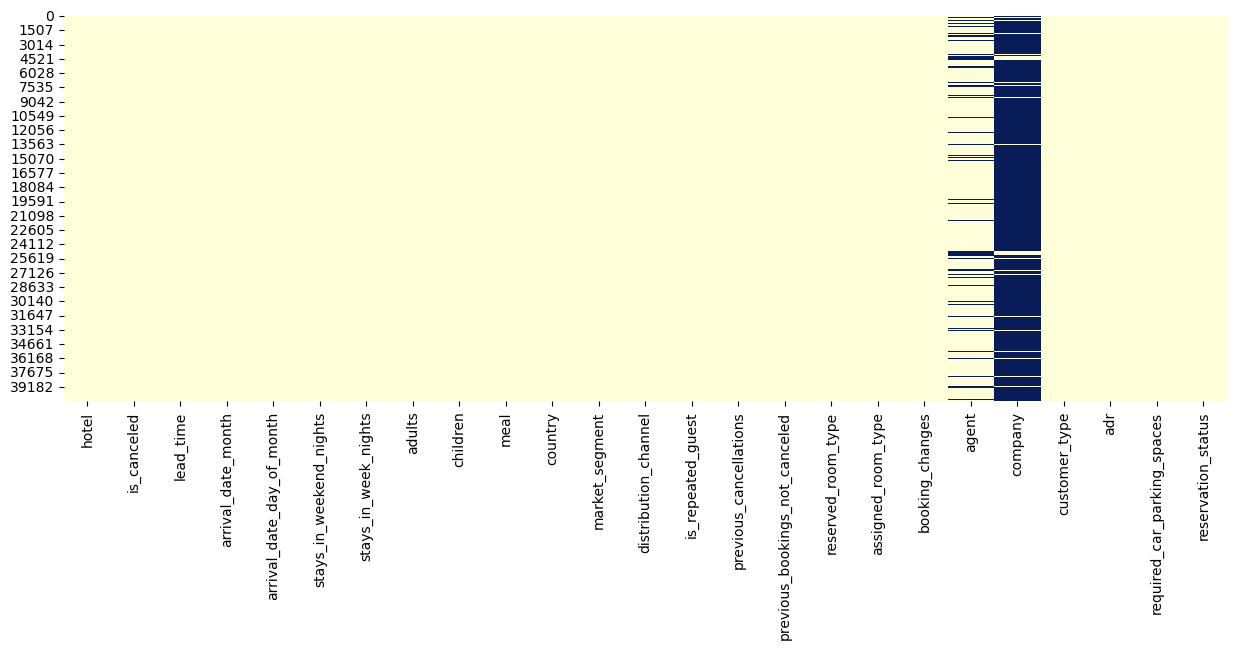

In [184]:
#let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(),cmap='YlGnBu', cbar = False)

# display the plot
plt.show()

Company column has more than 90% of missinf values hence we drop it.

In [185]:
df.drop(['company'], axis = 1, inplace = True)

In [186]:
# shape has reduced from 25 to 24 
df.shape

(40687, 24)

In [187]:
# replace "?" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.replace(to_replace = "?", value = np.NaN, inplace = True)

# replace "NULL" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.replace(to_replace = "NULL", value = np.NaN, inplace = True)

# replace "NULL" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.replace(to_replace = " ", value = np.NaN, inplace = True)

# Treat missing values

#### Agent 

In [188]:
# check mode value before treating them them
df.agent.value_counts()

9.0      13274
240.0     4929
14.0      1666
7.0       1413
250.0     1180
         ...  
472.0        1
187.0        1
270.0        1
416.0        1
299.0        1
Name: agent, Length: 191, dtype: int64

In [189]:
# check mode value
df.agent.describe()

count     35023.0
unique      191.0
top           9.0
freq      13274.0
Name: agent, dtype: float64

In [190]:
# replace all the missing values with 'Mode'
df.agent.replace(np.NaN,9.0 ,inplace = True)

In [192]:
# check the mode values after filling missing values
df.agent.value_counts()

9      18938
240     4929
14      1666
7       1413
250     1180
       ...  
299        1
337        1
416        1
363        1
270        1
Name: agent, Length: 191, dtype: int64

#### Country

In [193]:
# check the counts without filling missing values 
df.country.value_counts()

PRT    12962
GBR     5188
FRA     3902
DEU     2898
ESP     2612
       ...  
DJI        1
GNB        1
LIE        1
TZA        1
COM        1
Name: country, Length: 149, dtype: int64

In [194]:
# check the mode value of country column
df.country.describe()

count     40604
unique      149
top         PRT
freq      12962
Name: country, dtype: object

In [195]:
# replace all the missing values with 'Mode'
df.country.replace(np.NaN,'PRT' ,inplace = True)

In [196]:
# check the mode value counts after imputing missing values
df.country.value_counts()

PRT    13045
GBR     5188
FRA     3902
DEU     2898
ESP     2612
       ...  
DJI        1
GNB        1
LIE        1
TZA        1
COM        1
Name: country, Length: 149, dtype: int64

The missing values of country are updated with mode and hence the count for PRT has increased.

### Variance

In [197]:
# To check the variance 
df.var()

is_canceled                           0.237232
lead_time                         11651.249348
arrival_date_day_of_month            77.257230
stays_in_weekend_nights               1.028880
stays_in_week_nights                  3.893876
adults                                0.246187
children                              0.190217
is_repeated_guest                     0.033020
previous_cancellations                0.034048
previous_bookings_not_canceled        3.116389
booking_changes                       0.467075
agent                             13457.967424
adr                                2730.721279
required_car_parking_spaces           0.055646
dtype: float64

- The feature "adr" (average daily rate) has a relatively high variance of 2730.721279, suggesting a wide range of prices for bookings. This implies that the hotel's pricing for some bookings are more expensive than others bookings.
- The feature "lead_time" has a significantly higher variance of 11651.249348, this is because of difference in nooking patterns of customer.

### Standard Devition

In [198]:
# To check for the standard deviation 
df.std()

is_canceled                         0.487065
lead_time                         107.940953
arrival_date_day_of_month           8.789609
stays_in_weekend_nights             1.014337
stays_in_week_nights                1.973291
adults                              0.496172
children                            0.436139
is_repeated_guest                   0.181714
previous_cancellations              0.184520
previous_bookings_not_canceled      1.765330
booking_changes                     0.683429
agent                             116.008480
adr                                52.256304
required_car_parking_spaces         0.235894
dtype: float64

- The low standard deviations of "stays_in_weekend_nights" and "stays_in_week_nights" suggest a more consistent and predictable duration of weekend and weekday stays, indicating a certain level of stability in guests' accommodation preferences.

- The high standard deviation of "lead_time" implies a significant variation in the time interval between booking and arrival, reflecting diverse booking habits of customers.

In [199]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

### Coefficient of Variation

In [200]:
# importing variation from scipy.stats 
from scipy.stats import variation  

In [201]:
 for i in df_num.columns:   # iterate over each  columns
    print(i,":", scipy.stats.variation(df[i],nan_policy='omit'))  # ignore missing values

lead_time : 0.9879223351748079
arrival_date_day_of_month : 0.559214817573921
stays_in_weekend_nights : 1.0421411582632039
stays_in_week_nights : 0.7584982958188585
adults : 0.2641999914100506
children : 3.4536701767655784
agent : 1.3708344439246445
adr : 0.4558321355565185


#### Distribution of numerical variables

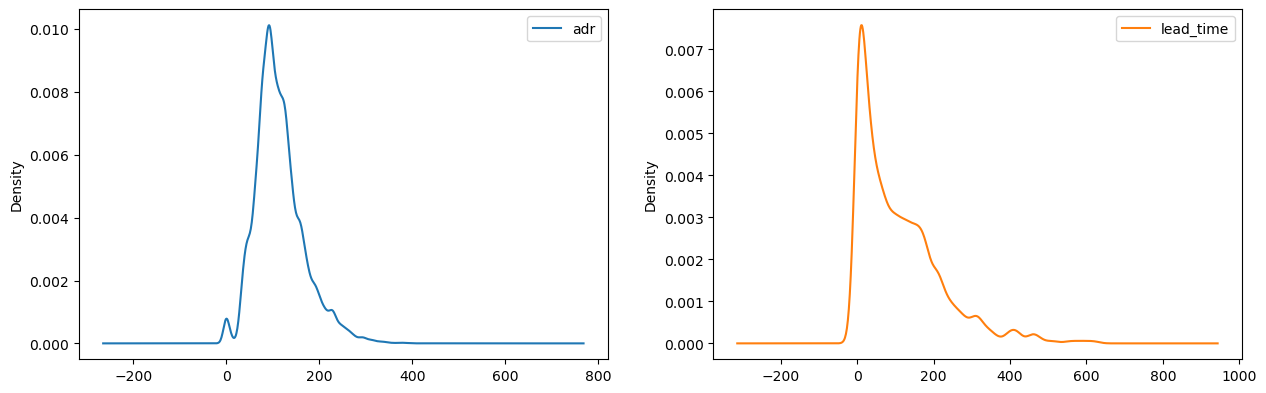

In [202]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

num_cols = ['adr', 'lead_time']

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df[num_cols].plot(kind = 'density', subplots = True, layout = (2,2), sharex = False)

# displat the plot
plt.show()

As we can see the distributions of these two numerical features are not normally distributed.

## Feature Engineering

In [203]:
# Calculate the total stay by summing stays_in_weekend_nights and stays_in_week_nights
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Merge adults and children to find the total number of people
df['total_people'] = df['adults'] + df['children']

Combining these columns we can find some good inferences out of it.

##### Now dropping the columns that are merged 

In [230]:
columns_to_drop = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']
df = df.drop(columns_to_drop, axis=1)

### Correlation

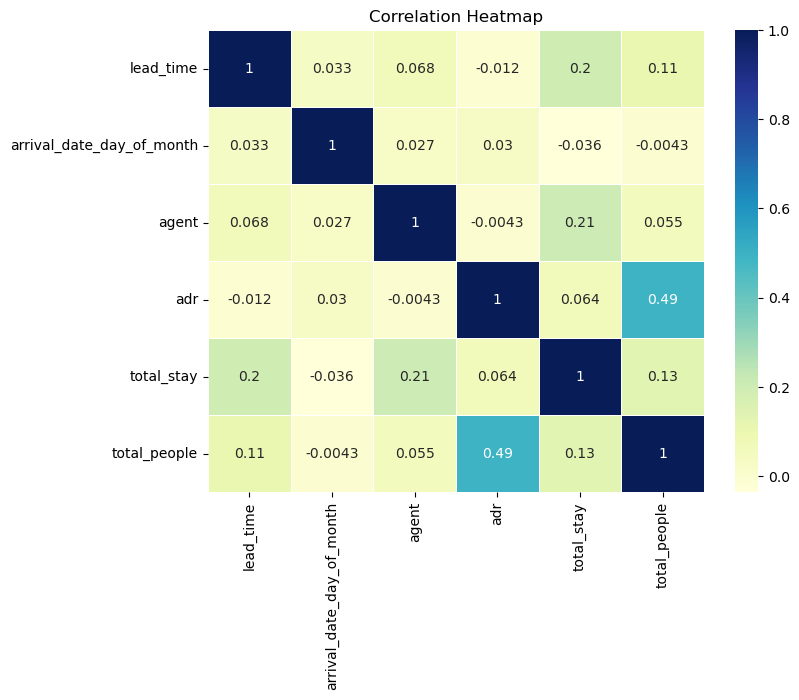

In [234]:
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

- "Total stay length" and "lead time" have slight correlation, that means for longer hotel stays people generally plan little before the actual arrival.

- "ADR" is slightly correlated with "total_people", which makes sense as more number of people means more revenue, therefore more ADR.

### Covariance

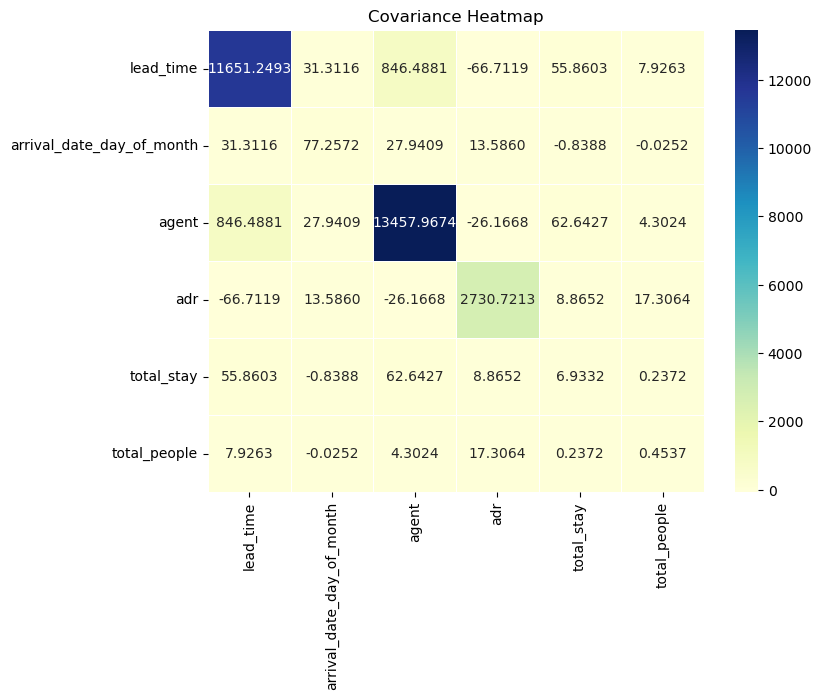

In [235]:
# Calculate the covariance matrix
cov_matrix = df.cov()

# Plot the covariance heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, linewidths=0.5, cmap="YlGnBu", fmt='.4f')
plt.title('Covariance Heatmap')
plt.show()

## Unvariate Analysis

### Which Hotel has highest bookings ?

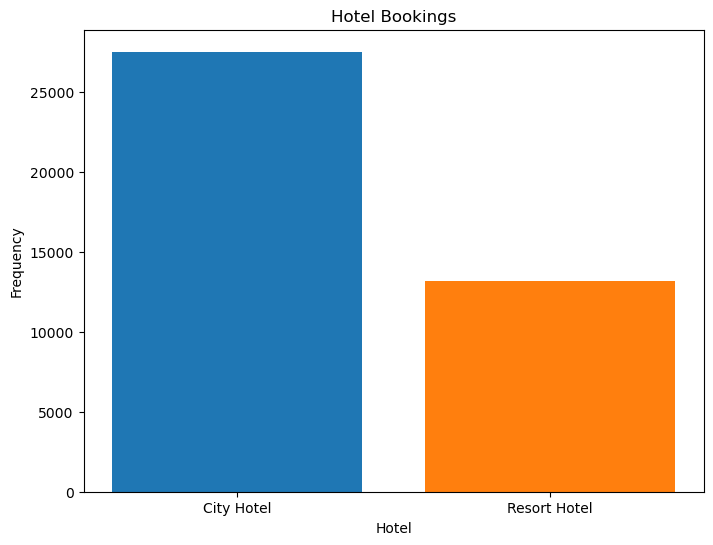

In [236]:
hotel_counts = df['hotel'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(hotel_counts.index, hotel_counts.values, color = ['tab:blue', 'tab:orange'])
plt.xlabel('Hotel')
plt.ylabel('Frequency')
plt.title('Hotel Bookings')
plt.show()

We can see that City hotel higher bookings than Resort hotel. Mostly customers prefer to stay in city hotels more.

### What is booking to cancellation ratio?

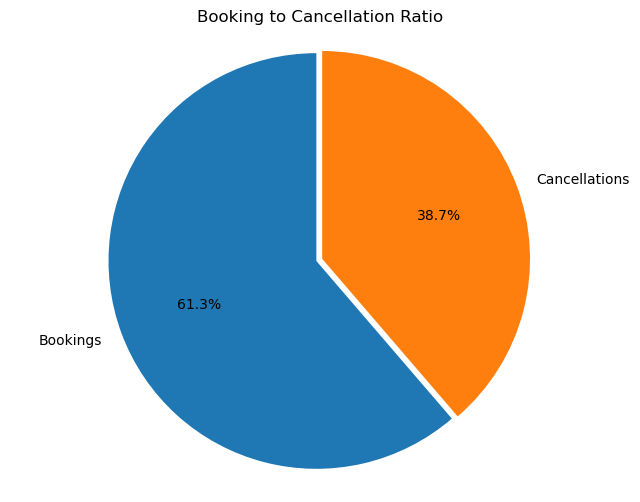

In [237]:
booking_counts = df['is_canceled'].value_counts()
booking_ratio = booking_counts[0] / booking_counts.sum()  # Ratio of bookings
cancellation_ratio = booking_counts[1] / booking_counts.sum()  # Ratio of cancellations

# Create the pie chart 
labels = ['Bookings', 'Cancellations']
ratios = [booking_ratio, cancellation_ratio]
explode = [0.03,0] # for seperation between catagories
highlight_color = ['tab:blue', 'tab:orange']

plt.figure(figsize=(8, 6))
plt.pie(ratios, labels=labels, explode=explode, colors=highlight_color, autopct='%1.1f%%', startangle=90)
plt.title('Booking to Cancellation Ratio')
plt.axis('equal')
plt.show()

 The booking ratio is 61.3% which is greater than the cancellation ratio i.e 38.7%

City Hotel has higher cancellation ratio. That means higher no. of customers who book city hotel tend to cancel their bookings.

### Which month has maximum bookings?

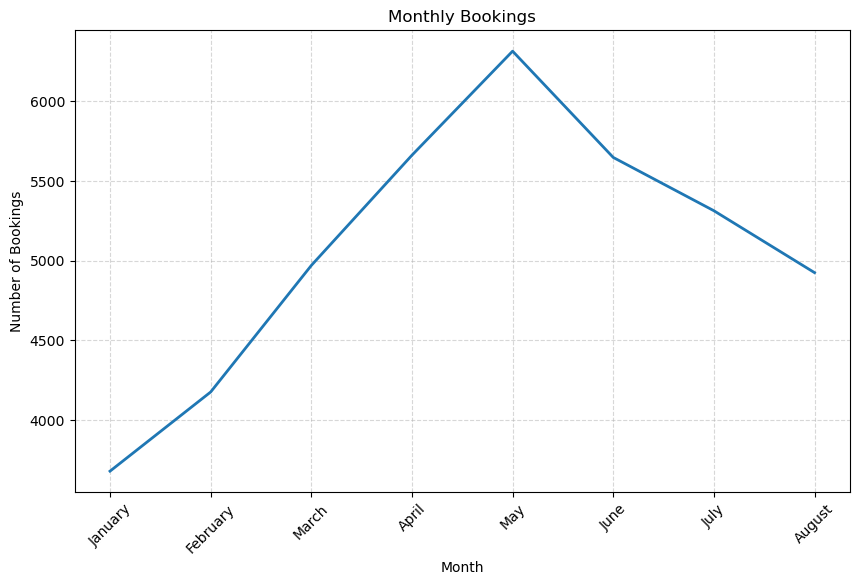

In [239]:
monthly_bookings = df.groupby('arrival_date_month')['hotel'].count()

# Define the order of the months for proper sorting on the x-axis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create the line chart with shorter grid size and no markers
plt.figure(figsize=(10, 6))
plt.plot(monthly_bookings.reindex(month_order).index, monthly_bookings.reindex(month_order).values, linestyle='-', marker='', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Monthly Bookings')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- The bookings increase from january to may , while after may the bookings start to decrease from june to august.

- May is the busiest month.

### Which agent has the highest number of bookings?

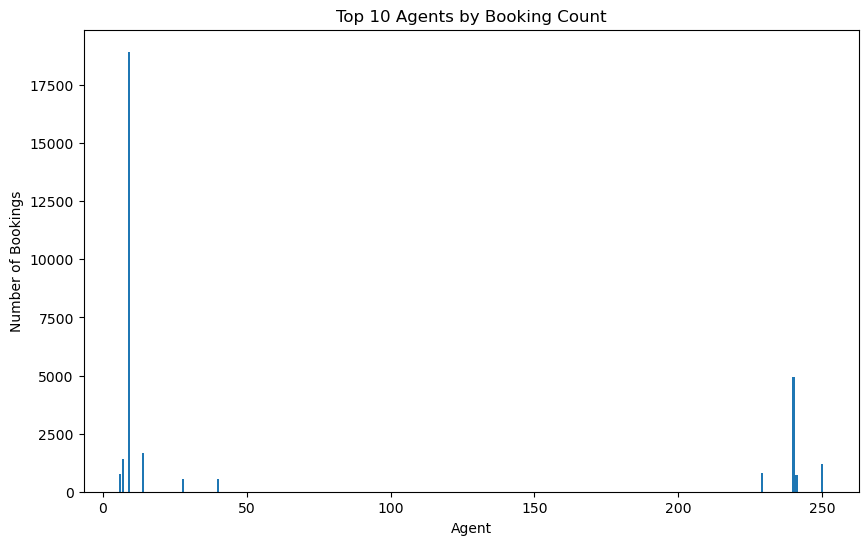

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
top_agents = df['agent'].value_counts().head(10)

# Sort the agents in ascending order
top_agents = top_agents.sort_index()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_agents.index, top_agents.values, width=0.8)
plt.xlabel('Agent')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Agents by Booking Count')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()


Agent 9 has the maximum number of bookings. This means maximum number of people book their hotels for agent 9.

### What type of meal is preffered by the customers?

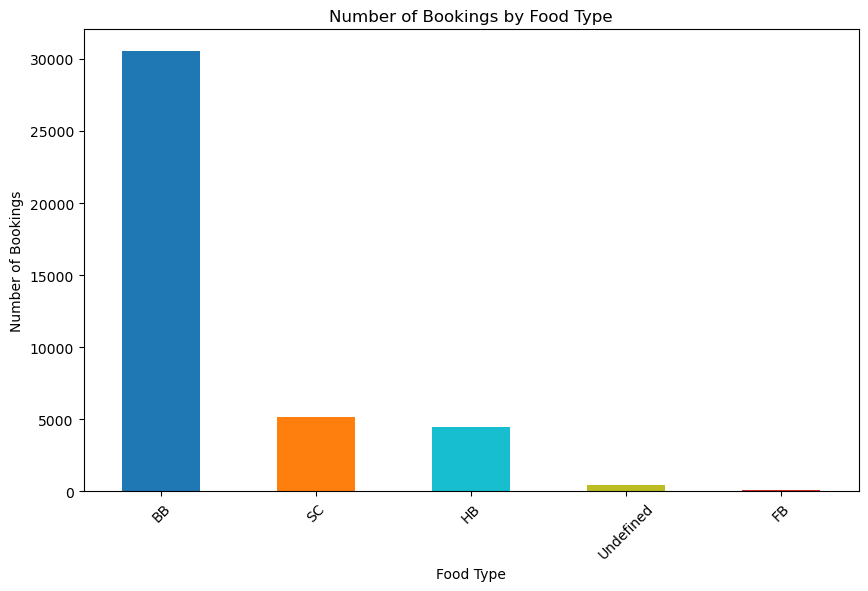

In [243]:
# Calculate the number of bookings for each food type
bookings_by_food_type = df['meal'].value_counts()

# Plot the number of bookings by food type
plt.figure(figsize=(10, 6))
bookings_by_food_type.plot(kind='bar', color = ['tab:blue', 'tab:orange', 'tab:cyan', 'tab:olive', 'tab:red'])
plt.xlabel('Food Type')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Food Type')
plt.xticks(rotation=45)
plt.show()

BB has the highest preferred food type, maximum number of people add only Breakfast as their meal while booking hotels.

### Which countries has most number of bookings by customers?

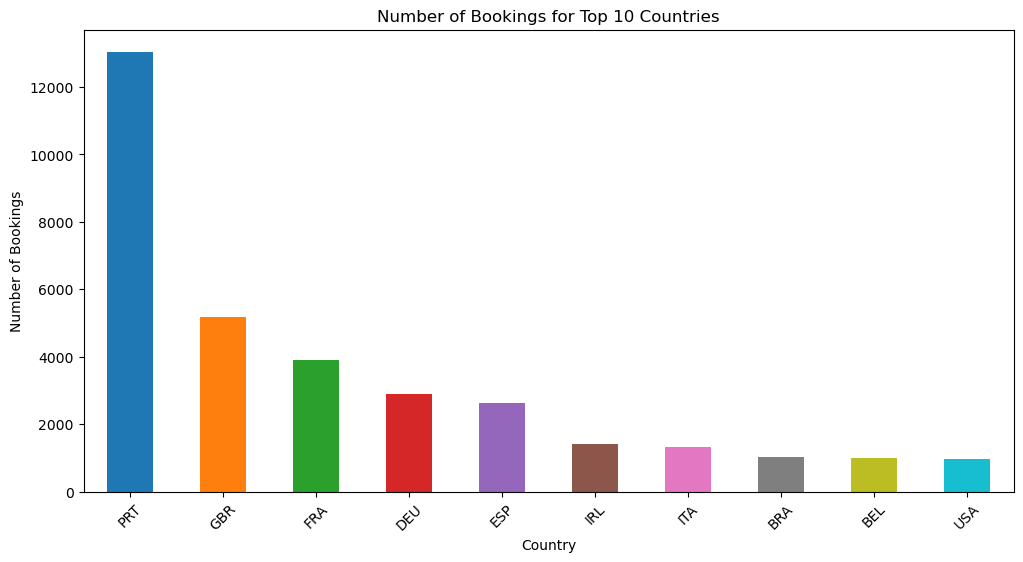

In [244]:
# Calculate the number of bookings for each country
bookings_by_country = df['country'].value_counts()

# Select the top 10 countries
top_10_countries = bookings_by_country.head(10)

# Define a color palette with tab colors for each country
color_palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
                 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Plot the number of bookings for the top 10 countries with tab colors for bars
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color=color_palette)
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings for Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

- Most of the bookings are done by european countries 

- Portugal(PRT) has the highest number of bookings

### Which type of rooms are in most demand?

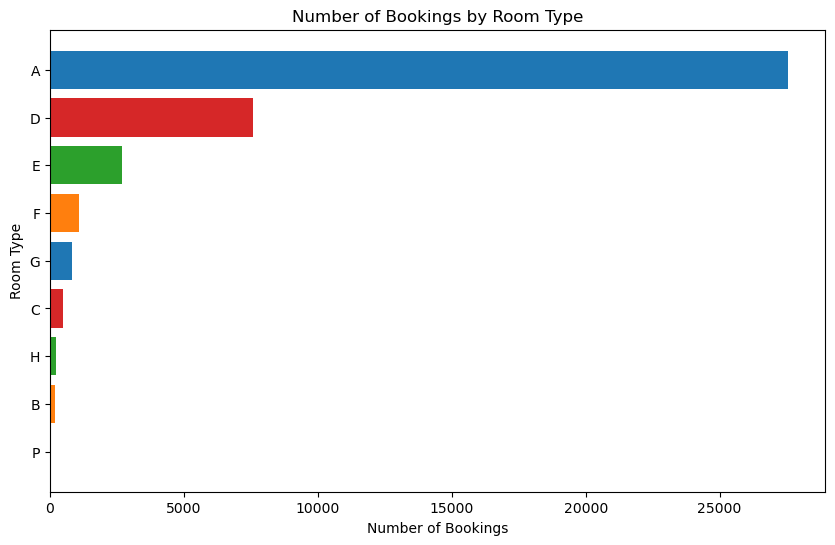

In [245]:
# Calculate the number of bookings for each room type
bookings_by_room_type = df['reserved_room_type'].value_counts()

# Sort the room types and bookings in descending order
bookings_by_room_type = bookings_by_room_type.sort_values(ascending=True)

# Define the room types and their corresponding tab colors
room_types = bookings_by_room_type.index
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot the number of bookings against room types using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(room_types, bookings_by_room_type, color=colors)
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.title('Number of Bookings by Room Type')
plt.show()

 Room type 'A' has the highest demand.

### By which market segment most of the bookings are done?

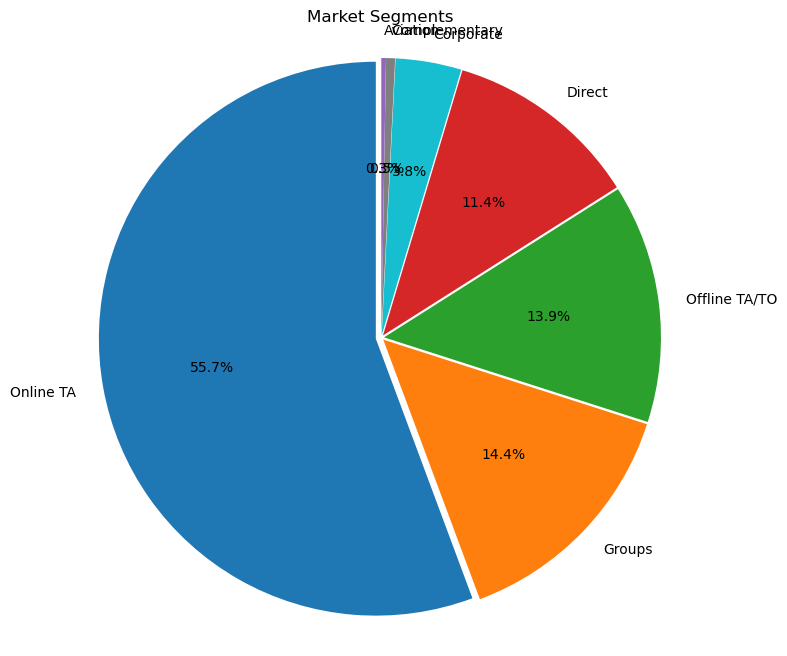

In [246]:

# Get the value counts of market segments from the column in your data
segment_counts = df['market_segment'].value_counts()

# Extract the market segment labels and their corresponding frequencies
market_segments = segment_counts.index
segment_sizes = segment_counts.values

# Define the colors for the pie chart segments
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:grey','tab:purple']

# Define the separation (explode) for the segments
separation = [0.02,0.01,0.01,0.01,0.01,0.01,0.01]

# Plot the pie chart with separated segments
plt.figure(figsize=(8, 8))
plt.pie(segment_sizes, labels=market_segments, colors=colors, explode=separation,
        autopct='%1.1f%%', startangle=90)
plt.title('Market Segments')
plt.axis('equal')
plt.show()

- The highest percent of booking is done by 'Online TA' followed by groups.
- Maximum bookings are done through online travel agencies.

# Bivariate Analysis

### Which market segment has the highest leadtime?

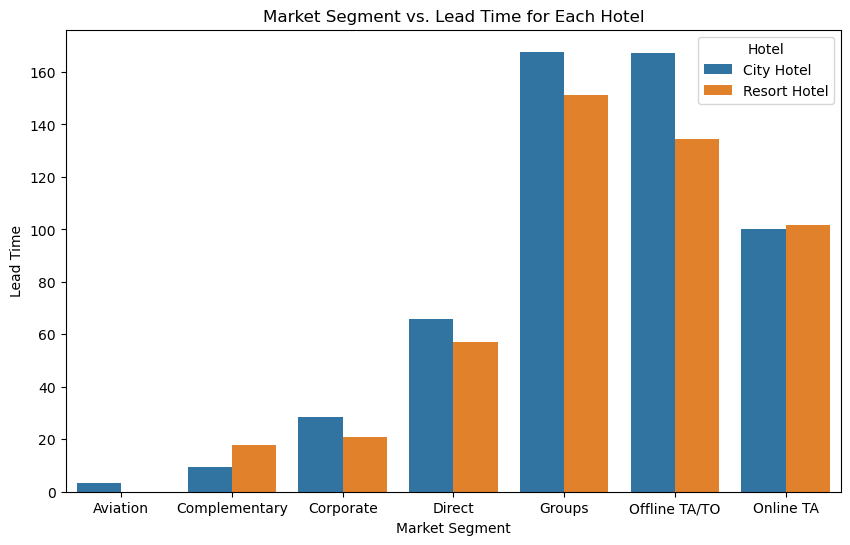

In [247]:
# Group the data by hotel and market segment, and calculate the average lead time
grouped_data = df.groupby(['market_segment', 'hotel'])['lead_time'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the custom colors for the bars
colors = ['tab:blue', 'tab:orange']

# Plot the grouped bar graph with custom colors
sns.barplot(data=grouped_data, x='market_segment', y='lead_time', hue='hotel', palette=colors)
plt.xlabel('Market Segment')
plt.ylabel('Lead Time')
plt.title('Market Segment vs. Lead Time for Each Hotel')
plt.legend(title='Hotel')

# Show the plot
plt.show()

"Groups" type Market Segment has the longest lead time(waiting time) for both Hotels. so we can say that early booking is essential for "Groups" type Market Segment.

### Which custtomers have higher cancellation ratio? (repeated(1), not_repeated(0))

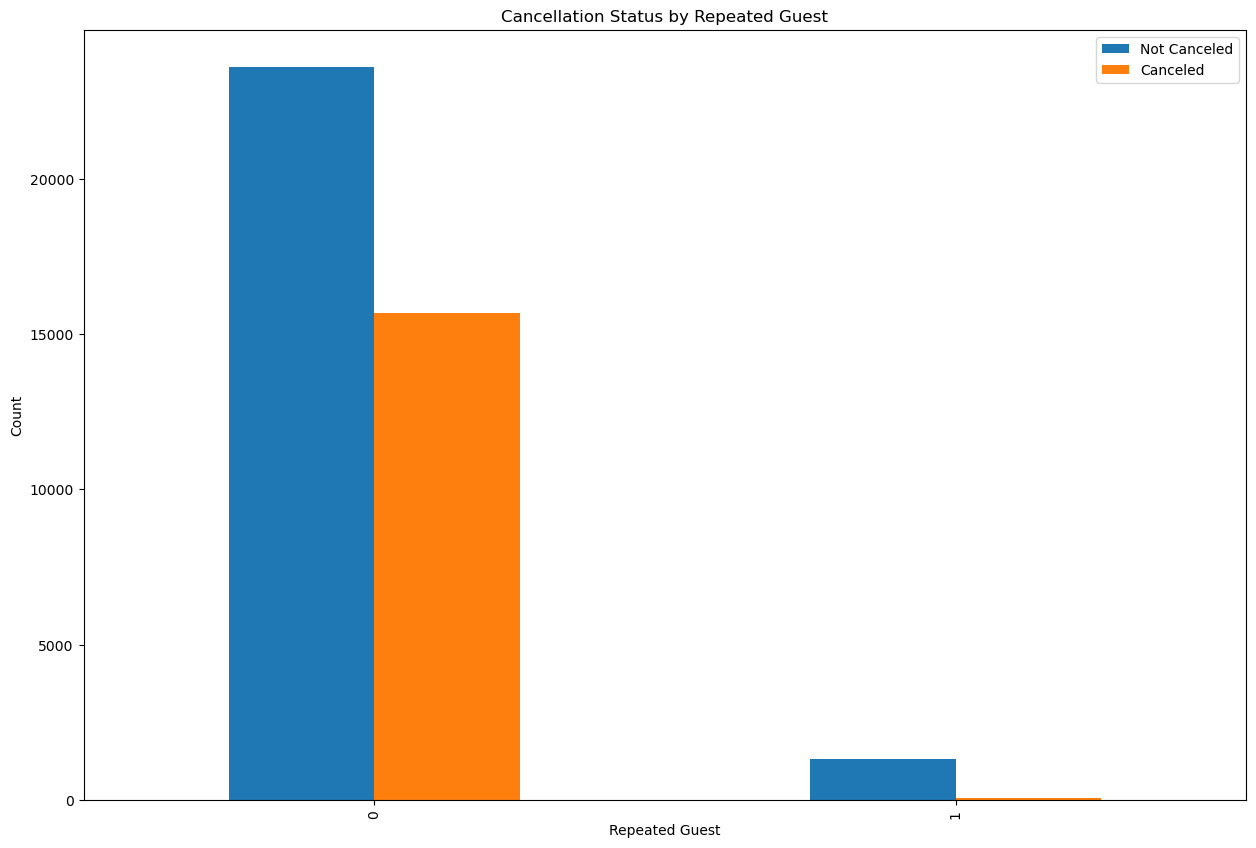

In [248]:
# Group the data by 'is_repeated_guest' and 'is_canceled' and calculate the counts
grouped_data = df.groupby(['is_repeated_guest', 'is_canceled']).size().unstack()

# Plotting the bar graph
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Cancellation Status by Repeated Guest')
plt.xlabel('Repeated Guest')
plt.ylabel('Count')
plt.legend(['Not Canceled', 'Canceled'])

# Display the plot
plt.show()

The cancellation ratio for non repeated guests(0) is higher than that of repeated guest.
- Majority of  People here can be  tourists. Therefore, the ratio for only once visited customers are high and repeated guests are very low.

### Which distribution channel has highest cancellation rate?

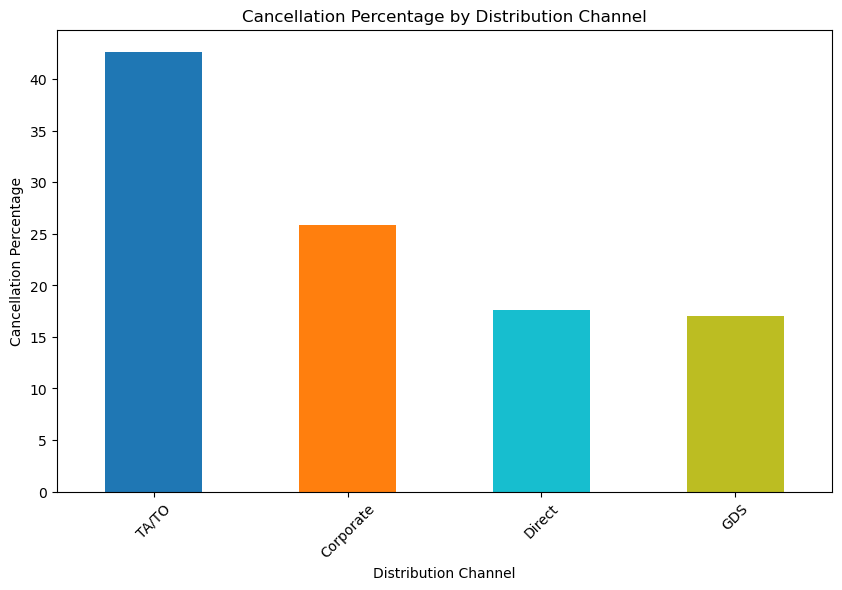

In [263]:
# Calculate the total bookings for each distribution channel
total_bookings = df['distribution_channel'].value_counts()

# Calculate the number of canceled bookings for each distribution channel
canceled_bookings = df[df['is_canceled'] == 1]['distribution_channel'].value_counts()

# Calculate the cancellation percentage for each distribution channel
cancellation_percent = (canceled_bookings / total_bookings) * 100

# Sort the cancellation percentage in descending order
cancellation_percent = cancellation_percent.sort_values(ascending=False)

# Define a color palette with tab colors for each bar
color_palette = ['tab:blue', 'tab:orange', 'tab:cyan', 'tab:olive', 'tab:red']
# Plot the cancellation percentage with tab colors for each bar
plt.figure(figsize=(10, 6))
cancellation_percent.plot(kind='bar', color=color_palette)
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Percentage')
plt.title('Cancellation Percentage by Distribution Channel')
plt.xticks(rotation=45)
plt.show()

- Majority of customers who have booked through travel agencies have highest chances of cancelling their bookings.
- Corporate customers who travel for business also have high chances of cancelling their bookings.

### Which hotel has higher booking to cancellation ratio?

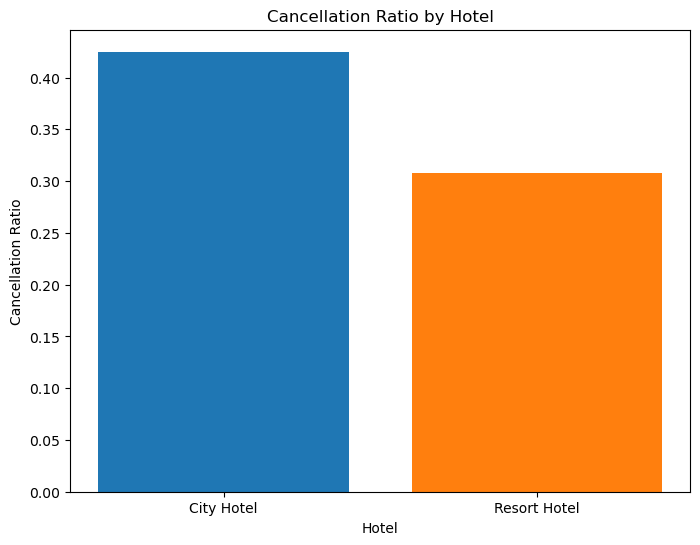

In [264]:
hotel_cancellation_ratio = df.groupby('hotel')['is_canceled'].mean()

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(hotel_cancellation_ratio.index, hotel_cancellation_ratio.values, color = ['tab:blue', 'tab:orange'])
plt.xlabel('Hotel')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Hotel')
plt.show()

Approximatly 42% of total bookings are cancelled of City hotels and 30% of Resort hotels. This means there are more chances of a city hotel customer to cancel his booking than resort hotel customers. 

# Statistical tests

### Chi sq : test of independence

Null Hypothesis (H0): There is no association between the Market Segment and cancellations. 

Alternative Hypothesis (H1): There is an association between the Market Segment and cancellations. .

In [249]:
from scipy.stats import chi2_contingency   # import necessary library for chi_sq test

# Columns: maket_segment(cat), is_canceled(binary)

# Create a contingency table of hypertension and stroke
contingency_table = pd.crosstab(df['market_segment'], df['is_canceled'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 2260.90770977345
p-value: 0.0
Degrees of freedom: 6
Expected frequencies: [[   67.4323494     42.5676506 ]
 [  131.18657065    82.81342935]
 [  957.53936147   604.46063853]
 [ 2837.67586698  1791.32413302]
 [ 3588.62703075  2265.37296925]
 [ 3473.99203677  2193.00796323]
 [13885.54678399  8765.45321601]]


**interpretation** :The cancellation ratio is highly dependent on Market segment.

**H0** : There is no significant association between customer_type and cancelled bookings.
    
**H1** : There is significant association between customer_type and cancelled bookings.

In [250]:
# Create a contingency table of customer_type and is_canceled
contingency_table = pd.crosstab(df['customer_type'], df['is_canceled'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1775.1934542580755
p-value: 0.0
Degrees of freedom: 3
Expected frequencies: [[  405.82013911   256.17986089]
 [  133.63865608    84.36134392]
 [20714.60471404 13076.39528596]
 [ 3687.93649077  2328.06350923]]


**Interpreatation** : Since the evidence against null hypothesis is so strong. We can say that the feature Customer type have significant effect on cancellation of bookings.

### F_test

**H0** : There is no significant difference in the mean lead_time across the different categories of the is_canceled variable.

**H1** : There is a significant difference in the mean lead_time across the different categories of the is_canceled variable.
    

In [251]:
# Grouping the data by the continuous variable and calculating cancellation rates
anova = df.groupby('lead_time')['is_canceled'].mean()

# Performing the ANOVA test
result_anova = stats.f_oneway(*[df[df['lead_time'] == value]['is_canceled'] for value in df['lead_time'].unique()])

# Extracting the F-statistic, p-value, degrees of freedom, and expected frequencies
# Extracting the F-statistic, p-value, and expected frequencies
f_statistic = result_anova.statistic
p_value = result_anova.pvalue

# Printing the ANOVA test results
print("ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)


ANOVA Results:
F-Statistic: 16.95971649764576
P-Value: 0.0


**Interprettaion** : Lead time influences the cancellation behaviour

**H0** : There is no significant difference in the mean 'adr' across the different categories of the is_canceled variable.

**H1** : There is a significant difference in the mean 'adr' across the different categories of the is_canceled variable.

In [252]:
# Grouping the data by the continuous variable and calculating cancellation rates
anova = df.groupby('adr')['is_canceled'].mean()

# Performing the ANOVA test
result_anova = stats.f_oneway(*[df[df['adr'] == value]['is_canceled'] for value in df['adr'].unique()])

# Extracting the F-statistic, p-value, degrees of freedom
f_statistic = result_anova.statistic
p_value = result_anova.pvalue

# Printing the ANOVA test results
print("ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

ANOVA Results:
F-Statistic: 2.48907785785765
P-Value: 0.0


**Interpreatation** : Average daily rate of hotels is significantly associated with cancellation of bookings. This means that the adr is affected if there are cancellation in bookings.

### Correlation analysis on numerical features

In [253]:
# Perform correlation analysis
correlation_coefficient, p_value = stats.pearsonr(df.lead_time, df.adr)

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Correlation Coefficient: -0.011827110995111117
P-Value: 0.017048554583331037


The negative correlation here shows that if the lead_time increases then the adr slightly decreases and vice versa.

# Outlier Treatment

In [268]:
# filter the numeric variables from the data
df_num = df[['adr', 'lead_time']].select_dtypes(include=np.number)

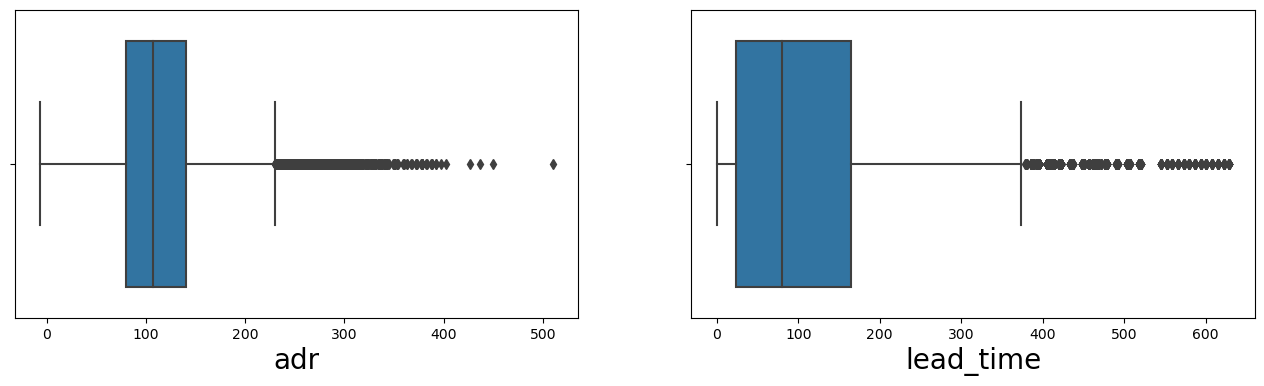

In [276]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # plot tghe box-plots
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot)
    # set the x-axis label
    z.set_xlabel(variable, fontsize = 20)     

There are high extreme values present in variable adr and lead_time. 

### IQR

In [277]:
# obtain the first quartile
Q1 = df_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

adr           60.0
lead_time    141.5
dtype: float64


In [278]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (0 for 'index')
df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [279]:
df_iqr.shape

(38076, 22)

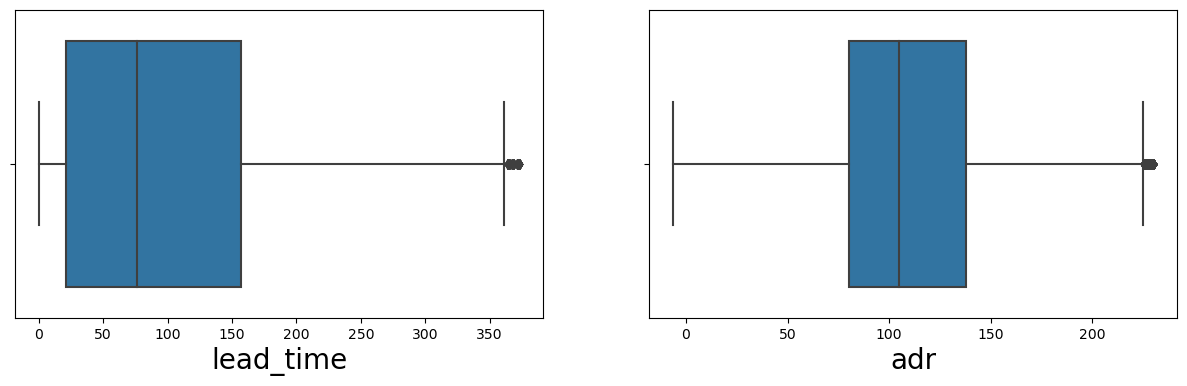

In [280]:
# consider the variables which has outliers
variables = ['lead_time','adr']

# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(df_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=df_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

After IQR treatment we can see that we have trimmed the extreme values. Which won't affect out model at the later stage.

# Encoding

### One-hot encoding

In [285]:
# Select the categorical columns to encode
categorical_cols = ['hotel', 'meal','country','market_segment','distribution_channel', 'reservation_status', 'arrival_date_month', 'customer_type']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first = True)

# Print the encoded DataFrame
print(df_encoded.head())

  is_canceled  lead_time  arrival_date_day_of_month is_repeated_guest  \
0           1         74                          1                 0   
1           1         62                          1                 0   
2           1         62                          1                 0   
3           1         62                          1                 0   
4           1         71                          1                 0   

  previous_cancellations previous_bookings_not_canceled reserved_room_type  \
0                      0                              0                  A   
1                      0                              0                  A   
2                      0                              0                  A   
3                      0                              0                  A   
4                      0                              0                  A   

  assigned_room_type booking_changes  agent  ...  arrival_date_month_August  \
0            

### Label encoding

In [292]:
# Select the columns to encode
columns_to_encode = ['reserved_room_type', 'assigned_room_type']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
df_encoded = df[columns_to_encode].apply(lambda x: label_encoder.fit_transform(x))

# Assign the encoded data back to the DataFrame
df[columns_to_encode] = df_encoded

# Print the encoded DataFrame
print(df.head())

          hotel is_canceled  lead_time arrival_date_month  \
0  Resort Hotel           1         74            January   
1  Resort Hotel           1         62            January   
2  Resort Hotel           1         62            January   
3  Resort Hotel           1         62            January   
4  Resort Hotel           1         71            January   

   arrival_date_day_of_month meal country market_segment distribution_channel  \
0                          1   BB     PRT      Online TA                TA/TO   
1                          1   BB     AUT      Online TA                TA/TO   
2                          1   BB     AUT      Online TA                TA/TO   
3                          1   BB     AUT      Online TA                TA/TO   
4                          1   BB     PRT      Online TA                TA/TO   

  is_repeated_guest  ... reserved_room_type assigned_room_type  \
0                 0  ...                  0                  0   
1             

# Conclusions

- Overall adr of City hotel is slightly higher than Resort hotel.
- Mostly guests stays for less than 4 nights in City hotel and for longer stays they preferred Resort hotel.
- Approximately 4% of visitors return for another booking at the City hotel, and 6% of visitors return to the Resort hotel for another stay.
- Europeans and Portuguese are the majority of guests.
- Mostly preferred channel for booking is TA/TO
- Booking cancellation ratio in TA/TO is 30%
- April- May are the most busier and profitable months for both of hotels.
- Couples are the most common guests for hotels, hence hotels can plan services according to couples needs to increase revenue.
- Lower the adr for longer the stays ( more than 15 days )
- Booking to cancellation ratio- 38.7%
- Agent 9 is done more number of bookings while Agent 464 has lowest cancellation ratio.
- When it comes to longer stays in hotel, guest do plan much in advance.
- Understanding lead time can also be useful for travelers as it allows them to plan their trips in advance, secure preferred accommodations, and potentially take advantage of early booking discounts or special offers.